In [1]:
import pandas as pd
import numpy as np

### Load the dataset

In [2]:
df = pd.io.parsers.read_csv("wine_data.csv",header=0)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Feature scaling
#### As we see in the table above the attributes are measured on different scales, for eg Alcohol (percent/volume), Malic acid(grams/litre), Magnesium (grams) etc, making Feature Scaling necessary prior to any comparison or combination of these data.
#### We try Normalization and Min-Max scaling

In [3]:
from sklearn import preprocessing
labels = df.iloc[0:,0]

std_scale = preprocessing.StandardScaler().fit(df.iloc[0:,1:])
df_std = pd.DataFrame(std_scale.transform(df.iloc[0:,1:]),columns = df.columns[1:])

mean_values = map(lambda x: round(abs(x),2),df_std.mean())
std_values = map(lambda x: round(abs(x),2),df_std.std())
print "Mean values of each column after standardization -"
print mean_values,"\n"

print "Standard deviation values of each column after standardization -"
print std_values

Mean values of each column after standardization -
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

Standard deviation values of each column after standardization -
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [4]:
minmax_scale = preprocessing.MinMaxScaler().fit(df.iloc[0:,1:])
df_minmax = pd.DataFrame(minmax_scale.transform(df.iloc[0:,1:]),columns = df.columns[1:])

min_values = map(lambda x: round(abs(x),2),df_minmax.min())
max_values = map(lambda x: round(abs(x),2),df_minmax.max())
print "Min values of each column after Min-Max scaling -"
print min_values,"\n"

print "Max values of each column after Min-Max scaling  -"
print max_values

Min values of each column after Min-Max scaling -
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

Max values of each column after Min-Max scaling  -
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### Plotting
#### Lets visualize the data on the three different scales

In [5]:
from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

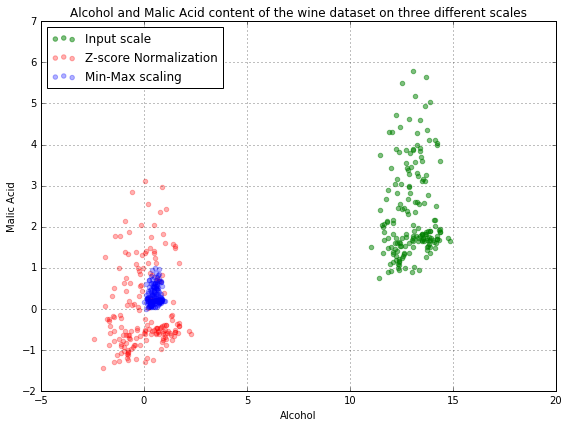

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(df['Alcohol'],df['Malic acid'], color='green', label='Input scale', alpha=0.5)
plt.scatter(df_std['Alcohol'],df_std['Malic acid'], color='red', label='Z-score Normalization', alpha=0.3)
plt.scatter(df_minmax['Alcohol'],df_minmax['Malic acid'], color='blue', label='Min-Max scaling', alpha=0.3)

plt.title('Alcohol and Malic Acid content of the wine dataset on three different scales')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
scatter_matrix(df_std, alpha=0.2, figsize=(16, 16))

### Classification
#### In terms of classification this dataset is good to test new classifiers, has a small number of samples and each class is well distributed. Most classifiers with default parameters will perform well.

In [58]:
from sklearn import cross_validation
def cross_val(clf):
    scores = cross_validation.cross_val_score(clf, df.iloc[0:,1:], labels, cv=5)
    print("Input Scale Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    scores1 = cross_validation.cross_val_score(clf, df_std, labels, cv=5)
    print("Standardization Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))
    scores2 = cross_validation.cross_val_score(clf, df_minmax, labels, cv=5)
    print("Min-Max Scalin Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
cross_val(clf)

Input Scale Accuracy: 0.96 (+/- 0.07)
Standardization Accuracy: 0.97 (+/- 0.06)
Min-Max Scalin Accuracy: 0.97 (+/- 0.05)


In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
cross_val(clf)

Input Scale Accuracy: 0.98 (+/- 0.02)
Standardization Accuracy: 0.98 (+/- 0.02)
Min-Max Scalin Accuracy: 0.98 (+/- 0.02)


In [50]:
clf = QuadraticDiscriminantAnalysis()
cross_val(clf)

Input Scale Accuracy: 0.96 (+/- 0.03)
Standardization Accuracy: 0.96 (+/- 0.03)
Min-Max Scalin Accuracy: 0.96 (+/- 0.03)


In [51]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
cross_val(clf)

Input Scale Accuracy: 0.96 (+/- 0.07)
Standardization Accuracy: 0.96 (+/- 0.07)
Min-Max Scalin Accuracy: 0.96 (+/- 0.07)


### Split the data into training and testing set

In [52]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_std, labels, test_size=0.3, random_state = 10)

### Fit the classifier

In [55]:
from sklearn.metrics import accuracy_score, classification_report
clf =  QuadraticDiscriminantAnalysis().fit(X_train, y_train)

### Evaluate the accuracy

In [56]:
y_pred = clf.predict(X_test)
print "Accuracy :", accuracy_score(y_test, y_pred)
print "\nClassification report:\n",classification_report(y_test, y_pred)

Accuracy : 0.962962962963

Classification report:
             precision    recall  f1-score   support

          1       0.88      1.00      0.94        15
          2       1.00      0.93      0.96        27
          3       1.00      1.00      1.00        12

avg / total       0.97      0.96      0.96        54

